In [1]:
from keras.datasets import cifar100
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model

In [2]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

169017344/169001437 [==============================] - 6s 0us/step


In [3]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(784,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(100,activation='Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 784)               2409232   
                                                                 
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
Total params: 3,103,172
Trainable params: 3,103,172
Non-trainable params: 0
_________________________________________________________________


In [5]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
391/391 [==============================] - 20s 50ms/step - loss: 4.0729 - accuracy: 0.0845 - val_loss: 3.8004 - val_accuracy: 0.1249
Epoch 2/50
391/391 [==============================] - 19s 48ms/step - loss: 3.6812 - accuracy: 0.1451 - val_loss: 3.6316 - val_accuracy: 0.1575
Epoch 3/50
391/391 [==============================] - 19s 48ms/step - loss: 3.5110 - accuracy: 0.1769 - val_loss: 3.5503 - val_accuracy: 0.1763
Epoch 4/50
391/391 [==============================] - 19s 49ms/step - loss: 3.3874 - accuracy: 0.2002 - val_loss: 3.4328 - val_accuracy: 0.1939
Epoch 5/50
391/391 [==============================] - 19s 48ms/step - loss: 3.2822 - accuracy: 0.2158 - val_loss: 3.3703 - val_accuracy: 0.2037
Epoch 6/50
391/391 [==============================] - 19s 47ms/step - loss: 3.1948 - accuracy: 0.2308 - val_loss: 3.3451 - val_accuracy: 0.2100
Epoch 7/50
391/391 [==============================] - 19s 47ms/step - loss: 3.1111 - accuracy: 0.2490 - val_loss: 3.2752 - val_accuracy:

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 5.1087 - accuracy: 0.2683


[5.108741760253906, 0.26829999685287476]

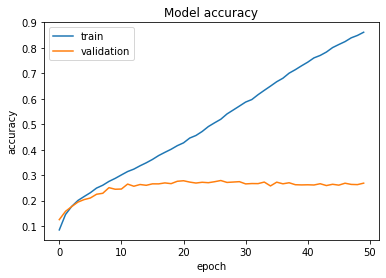

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc = "upper left")

In [8]:
model.save ("nhandien100vat.h5")